# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name= 'week06lab'

In [2]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
        


In [3]:
download_file('week06lab.zip',file_url)

In [4]:
!dir

 Volume in drive C is OS
 Volume Serial Number is C6E7-7DF5

 Directory of C:\Users\saket\Downloads

03/15/2022  04:34 PM    <DIR>          .
03/15/2022  04:34 PM    <DIR>          ..
03/08/2022  09:52 PM    <DIR>          .ipynb_checkpoints
03/04/2022  09:53 PM            95,759 21-22-Emergency Relief Grant-Application (1).pdf
03/04/2022  10:03 PM           126,997 21-22-Emergency Relief Grant-Application.pdf
03/07/2022  12:14 AM         1,175,775 a52967a2-84d3-4b03-bf9b-8699d417db34.pdf
02/08/2022  07:38 PM       535,052,832 Anaconda3-2021.11-Windows-x86_64.exe
02/20/2022  02:25 PM            48,846 Art of criticism.pdf
02/06/2022  06:42 PM         1,343,320 ChromeSetup.exe
02/10/2022  12:38 AM            18,466 Class Discussion - Week 1 (1).docx
02/08/2022  03:51 PM            18,466 Class Discussion - Week 1.docx
02/10/2022  09:42 PM            15,871 Class Discussion - Week 2.docx
02/27/2022  10:03 PM            17,601 Class Discussion - Week 3.docx
02/06/2022  09:16 PM           

In [5]:
from zipfile import ZipFile

In [6]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [7]:
unzip('week06lab.zip')

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


In [8]:
!dir

 Volume in drive C is OS
 Volume Serial Number is C6E7-7DF5

 Directory of C:\Users\saket\Downloads

03/15/2022  04:34 PM    <DIR>          .
03/15/2022  04:34 PM    <DIR>          ..
03/08/2022  09:52 PM    <DIR>          .ipynb_checkpoints
03/04/2022  09:53 PM            95,759 21-22-Emergency Relief Grant-Application (1).pdf
03/04/2022  10:03 PM           126,997 21-22-Emergency Relief Grant-Application.pdf
03/07/2022  12:14 AM         1,175,775 a52967a2-84d3-4b03-bf9b-8699d417db34.pdf
02/08/2022  07:38 PM       535,052,832 Anaconda3-2021.11-Windows-x86_64.exe
02/20/2022  02:25 PM            48,846 Art of criticism.pdf
02/06/2022  06:42 PM         1,343,320 ChromeSetup.exe
02/10/2022  12:38 AM            18,466 Class Discussion - Week 1 (1).docx
02/08/2022  03:51 PM            18,466 Class Discussion - Week 1.docx
02/10/2022  09:42 PM            15,871 Class Discussion - Week 2.docx
02/27/2022  10:03 PM            17,601 Class Discussion - Week 3.docx
02/06/2022  09:16 PM           

## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [14]:
## Your code is here
import pandas as pd
with open('PoliceShootingsUS.csv') as file:
    line=file.readline()
    

In [10]:
print(line)

id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera



In [11]:
import chardet
with open('PoliceShootingsUS.csv', 'rb') as f:
    content = f.read()
    result = chardet.detect(content)
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [12]:
chardet.detect(open('PoliceShootingsUS.csv', 'rb').read())

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [15]:
df = pd.read_csv('PoliceShootingsUS.csv', encoding='Windows-1252')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [16]:
#calcuating the number of offenders with age older than 55

offender_count  =0
for i in df.age :
    if i>55:
        offender_count = offender_count+1
print(offender_count)

235


* What's the age distribution?

Text(0.5, 1.0, 'age distribution')

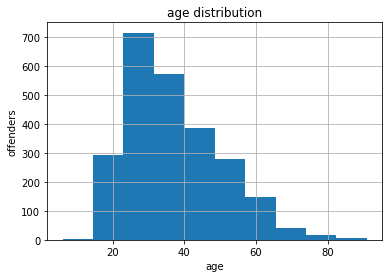

In [17]:
## Your code is here
#plotting the age distribution using hist0gram 
import matplotlib.pyplot as plt
df.age.hist()
plt.ylabel('offenders')
plt.xlabel('age')
plt.title('age distribution')

In [18]:
#sum total of all the offenders
df.age.sum()

89976.0

In [19]:
#minimum age of the offender among all the offenders
df.age.min()

6.0

In [20]:
#maximum age of the offender among all the offenders
df.age.max()

91.0

In [21]:
#mean age of the offenders
df.age.mean()

36.605370219690805

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [40]:
## Your code is here
df = pd.read_csv('volunteers.txt')
df

,log[Harding,Christine] (Virginia) - Universal human-resource flexibility
0,log[Davis,Kimberly] (New York) - Compatible demand-driv...
1,log[Ingram,Rachel] (Louisiana) - Versatile multimedia we...
2,log[Walker,Richard] (Oregon) - Networked eco-centric app...
3,log[Barnes,Francisco] (Virginia) - Persistent systematic...
4,log[Perez,Rachel] (Alaska) - Optimized national portal
...,...,...
94,log[Smith,Kevin] (North Dakota) - Seamless discrete tim...
95,log[Moore,Mark] (Alaska) - Team-oriented actuating capa...
96,log[Landry,Jennifer] (Wyoming) - User-centric object-ori...
97,log[Phillips,Lori] (Arkansas) - Sharable content-based par...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   log[Harding                                                    99 non-null     object
 1    Christine] (Virginia) - Universal human-resource flexibility  99 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [32]:
list(df)

['log[Harding',
 ' Christine] (Virginia) - Universal human-resource flexibility']

In [48]:
df2= df['log[Harding'].str.split(pat='[', n = 1, expand=True)

In [49]:
df3= df[' Christine] (Virginia) - Universal human-resource flexibility'].str.split(pat=']', n = 0, expand=True)

In [107]:
df2

,0,1
0,log,Davis
1,log,Ingram
2,log,Walker
3,log,Barnes
4,log,Perez
...,...,...
94,log,Smith
95,log,Moore
96,log,Landry
97,log,Phillips


In [50]:
df3

,0,1
0,Kimberly,(New York) - Compatible demand-driven hub
1,Rachel,(Louisiana) - Versatile multimedia website
2,Richard,(Oregon) - Networked eco-centric approach
3,Francisco,(Virginia) - Persistent systematic moratorium
4,Rachel,(Alaska) - Optimized national portal
...,...,...
94,Kevin,(North Dakota) - Seamless discrete time-frame
95,Mark,(Alaska) - Team-oriented actuating capacity
96,Jennifer,(Wyoming) - User-centric object-oriented neur...
97,Lori,(Arkansas) - Sharable content-based parallelism


In [101]:
df6=df3[1].str.split(pat=')', n = 1, expand=True)

In [102]:
df6

,0,1
0,(New York,- Compatible demand-driven hub
1,(Louisiana,- Versatile multimedia website
2,(Oregon,- Networked eco-centric approach
3,(Virginia,- Persistent systematic moratorium
4,(Alaska,- Optimized national portal
...,...,...
94,(North Dakota,- Seamless discrete time-frame
95,(Alaska,- Team-oriented actuating capacity
96,(Wyoming,- User-centric object-oriented neural-net
97,(Arkansas,- Sharable content-based parallelism


In [103]:
df7=df6[0].str.split(pat='(', n = 1, expand=True)

In [104]:
df7

,0,1
0,,New York
1,,Louisiana
2,,Oregon
3,,Virginia
4,,Alaska
...,...,...
94,,North Dakota
95,,Alaska
96,,Wyoming
97,,Arkansas


In [105]:
new = pd.DataFrame().assign(name=df2[1], lastname=df3[0], state=df7[1])

In [106]:
# final new dataframe with name lastname and state
new

,name,lastname,state
0,Davis,Kimberly,New York
1,Ingram,Rachel,Louisiana
2,Walker,Richard,Oregon
3,Barnes,Francisco,Virginia
4,Perez,Rachel,Alaska
...,...,...,...
94,Smith,Kevin,North Dakota
95,Moore,Mark,Alaska
96,Landry,Jennifer,Wyoming
97,Phillips,Lori,Arkansas


In [89]:
df5

0                                                      Kimberly
1                                                        Rachel
2                                                       Richard
3                                                     Francisco
4                                                        Rachel
                                    ...                        
97                                                         Lori
98                                                      Tiffany
name          0        Davis
1       Ingram
2       Walker
3...
last name     0       Kimberly
1         Rachel
2        Ric...
first name    0        Davis
1       Ingram
2       Walker
3...
Name: 0, Length: 102, dtype: object

0       Kimberly
1         Rachel
2        Richard
3      Francisco
4         Rachel
         ...    
94         Kevin
95          Mark
96      Jennifer
97          Lori
98       Tiffany
Name: 0, Length: 198, dtype: object

0                                                     Kimberly
1                                                       Rachel
2                                                      Richard
3                                                    Francisco
4                                                       Rachel
                                   ...                        
96                                                    Jennifer
97                                                        Lori
98                                                     Tiffany
name         0        Davis
1       Ingram
2       Walker
3...
last name    0       Kimberly
1         Rachel
2        Ric...
Name: 0, Length: 101, dtype: object